# 2018-09-06 (Jueves)

## Descarga datos Casen 2017

http://observatorio.ministeriodesarrollosocial.gob.cl/casen-multidimensional/casen/basedatos.php

## Tarea 3, entrega 4 de octubre

## NLP -- revisar clase pasada

---

## Que estamos haciendo?


## Bases de datos

Lo que usualmente entendemos por "base de datos" es un objeto que tiene filas (registros) y columnas (variables). Cada fila, en este paradigma, es un conjunto de información referida a algún registro único.

Existen bases de datos más complejas, que nos permiten almacenar y administrar datos basados en relaciones de distintos tipos de registros ("Relational Model"). En las siguientes clases veremos un poco más sobre esto.

### Bases de datos en Python

Ya trabajamos con algunas estructuras de datos básicas en python (listas, tuplas, diccionarios), pero dichas estructuras no nos permiten realizar operaciones que comúnmente quisieramos hacer con los datos, por ejemplo:
- Análisis de subconjuntos de datos
- Estadísticas o tablas resúmen
- Gráficos

Para facilitar lo anterior, utilizaremos una librería muy potente de Python llamada "Pandas".

## Pandas

In [2]:
#importamos la librería pandas, asignandole el nombre "pd", sólo para facilitar el uso de la librería
import pandas as pd

df = pd.DataFrame([(10, 20, 15), (30, 40, 5)])

df


,0,1,2
0,10,20,15
1,30,40,5


In [3]:
print('Este dataframe tiene')

print(len(df), 'filas')

print(len(df.columns), 'columnas')


Este dataframe tiene
2 filas
3 columnas


In [4]:
# para poder "imprimir" un dataframe, es mejor ocupar "display"

print(df)

from IPython.display import display

display(df)

    0   1   2
0  10  20  15
1  30  40   5


,0,1,2
0,10,20,15
1,30,40,5


## Objetos importantes de la librería Pandas

### 1. "Series"

Es la "base de datos" más simple de Pandas. Una serie puede ser entendida como un vector de datos (1 dimensión). En general no trabajamos directamente con objetos "Series", sino que accedemos a ellos a través de "DataFrames".


### 2. "DataFrame"

Un objeto más potente de datos son los "DataFrame". Este objeto es muy similar a lo que entendemos nosotros por "base de datos", donde tenemos N filas y K columnas. Cada columna en este objeto es un objeto "Serie".

Para realizar operaciones sobre las columnas:
- En ciertos casos, lo podremos hacer para muchas columnas de un DataFrame
- Podemos hacerlo columna por columna, trabajando con atributos y métodos disponibles en el objeto "Serie".

*Documentación sobre atributos y métodos de DataFrames: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html*

*Documentación sobre atributos y métodos de Series: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html*


### 3. "GroupBy"

Un objeto "GroupBy" es un objeto "intermedio", que construimos desde una base de datos "desagrupada" y nos permite crear bases de datos "agrupadas", según las reglas agrupación que definamos.

Documentación completa aquí: http://pandas.pydata.org/pandas-docs/stable/groupby.html

Funciones disponibles: http://pandas.pydata.org/pandas-docs/stable/api.html?highlight=groupby#groupby

### 4. "MultiIndex"

Este es un objeto un poco más complejo de datos, donde los índices, tanto de filas como de columnas, pueden tener múltiples "niveles". No utilizaremos este objeto por ahora.

## Ejemplo 1. Carga de datos desde Stata

Lea los datos de la Casen 2017, y calcule el promedio (simple) de ingreso del hogar (ytoth).

** Antes de comenzar **

- Funciones para leer datos:
    - read_stata: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_stata.html
    - read_excel: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html
    - read_csv: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    - read_sql: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html


In [11]:
# lectura información: función "read_stata"

#lectura desde Stata es lenta...
df_casen = pd.read_stata(r'C:\Users\calvarad\Sync\Clase Data Science\Datos\casen_2017_stata\Casen 2017.dta', convert_categoricals=False)

In [7]:
# podemos acceder a las columnas del dataframe como si fueran "atributos" del DataFrame
ingreso = 

ingreso.mean()

1099657.9843651098

** Quiz: que tipo de objeto es "ingreso" **

## Ejemplo 2. Creación de un DataFrame desde Python

Carguemos los datos de lista de alumnos (clase X) y guardemoslos en un DataFrame

In [5]:
# codigo copiado desde clase 4 (lee lista de alumnos del curso)

#leemos archivo de otra carpeta
archivo = open('../clase4_20180821/nombres.txt', 'r', encoding='utf-8')

cols = archivo.readline()

data_nombres = []
for line in archivo:
    num, rut, ape, nom, cur = line.strip().split('\t')
    data_nombres.append((num, rut, ape, nom, cur))

archivo.close()

for tupla in data_nombres:
    print(tupla)


('1', '19732761-8', 'ABURTO ABURTO', 'MAURICIO HERNÁN', '050004')
('2', '18935035-K', 'ALDUNATE BARROS', 'MATÍAS', '050004')
('3', '19828661-3', 'BARRERA ABARCA', 'MAURICIO JAIR', '050004')
('4', '19672788-4', 'BULNES ZAÑARTU', 'MARIA ANTONIA', '050004')
('5', '95404-7', 'CORNEJO ARIAS', 'DAVID ROLANDO', '000301')
('6', '95506-K', 'ESCOBAR MADRID', 'RAMÓN ALBERTO', '000301')
('7', '19133672-0', 'GARCIA HOFFMANN', 'GONZALO ALONSO', '050004')
('8', '19741184-8', 'HURTADO CONTRERAS', 'CAMILA CONSTANZA', '050004')
('9', '95521-3', 'KASKE', 'AURELIEN', '000302')
('10', '19080962-5', 'MARISCAL BRESLER', 'VICENTE', '050004')
('11', '19636956-2', 'PASTEN PARDO', 'NICOLAS RODRIGO', '050004')
('12', '95657-0', 'QUINTERO MARTINEZ', 'MIGUEL ANGEL', '000302')
('13', '19685544-0', 'RAFOLS VALENZUELA', 'MARTIN', '050004')
('14', '95707-0', 'REYES MAGAÑA', 'GABRIELA GUADALUPE', '000301')
('15', '19635591-K', 'RODRIGUEZ ARNOLDS', 'NICOLAS', '050004')
('16', '19688168-9', 'ROSALES CORREA', 'PAULO ALEJAN

In [ ]:
#pero mejor ocupemos pandas!

df_nombres = pd.DataFrame(data_nombres)
df_nombres

## Ejemplo 3. Manipulacion basica de DataFrames

In [8]:
#seleccionar ciertas filas, segun numero de fila

df_casen[1:3]



,folio,o,id_vivienda,hogar,region,provincia,comuna,zona,expr,expc,...,hh_d_estado,hh_d_servbas,hh_d_entorno,hh_d_accesi,hh_d_medio,hh_d_appart,hh_d_tsocial,hh_d_seg,pobreza_multi_4d,pobreza_multi_5d
1,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN


In [25]:
#tambien podemos usar la funcion "iloc"

df_casen.iloc[1:3]

,folio,o,id_vivienda,hogar,region,provincia,comuna,zona,expr,expc,...,hh_d_estado,hh_d_servbas,hh_d_entorno,hh_d_accesi,hh_d_medio,hh_d_appart,hh_d_tsocial,hh_d_seg,pobreza_multi_4d,pobreza_multi_5d
1,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN


In [12]:
#seleccionar ciertas columnas, segun "numero" de columna

df_casen.iloc[:, 1:3]

,o,id_vivienda
0,1.0,1.101100e+09
1,1.0,1.101100e+09
2,1.0,1.101100e+09
3,2.0,1.101100e+09
4,1.0,1.101100e+09
5,2.0,1.101100e+09
6,3.0,1.101100e+09
7,1.0,1.101100e+09
8,2.0,1.101100e+09
9,1.0,1.101100e+09


In [20]:
#iloc tambien sirve para filas.. 

#seleccione las filas 10, 20 y 30, para las columnas 5 7 y 9

df_casen.iloc[[10, 20, 30], [5, 7, 9]]

#uso general de iloc:   df.iloc[row_indexer,column_indexer]

,provincia,zona,expc
10,11.0,1.0,33.0
20,11.0,1.0,8.0
30,11.0,1.0,8.0


In [19]:
# un uso mas "razonable" es usar los nombres de los indices (no la posicion)

df_casen.loc[[10, 20, 30], ['provincia', 'zona']]


,provincia,zona
10,11.0,1.0
20,11.0,1.0
30,11.0,1.0


In [21]:
#Tambien podemos seleccionar columnas de una forma mas directa

df_casen[['region', 'ytoth']].head()


,region,ytoth
0,1.0,250000.0
1,1.0,211091.0
2,1.0,593500.0
3,1.0,593500.0
4,1.0,341667.0


In [ ]:
# y podemos seleccionar multiples Series con algun criterio particular

#por ej, aqui seleccionamos las columnas cuyo nombre parta con "yt"

#primero creamos una lista con los nombres que nos interesan
sel_cols = [y for y in df_casen.columns if y.startswith('yt')]

#seleccionamos las columnas correspondientes a esos nombres
df_casen[sel_cols].describe()

In [22]:
# finalmente, podemos seleccionar ciertos datos usando criterios de busqueda

seleccion = df_casen.region == 1

df_region1 = df_casen[seleccion]

df_region1.head()

,folio,o,id_vivienda,hogar,region,provincia,comuna,zona,expr,expc,...,hh_d_estado,hh_d_servbas,hh_d_entorno,hh_d_accesi,hh_d_medio,hh_d_appart,hh_d_tsocial,hh_d_seg,pobreza_multi_4d,pobreza_multi_5d
0,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN
1,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
3,1.101100e+11,2.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,NaN
4,1.101100e+11,1.0,1.101100e+09,1.0,1.0,11.0,1101.0,1.0,39.0,33.0,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,0.0,NaN


In [23]:
df_new = df_casen.copy()


In [24]:
del df_new

## Ejemplos de Groupby

** VISITAR **: Funciones disponibles: http://pandas.pydata.org/pandas-docs/stable/api.html?highlight=groupby#groupby


In [ ]:
import numpy as np

df = pd.DataFrame({'Comuna' : ['foo', 'foo', 'foo', 'foo',
                              'bar', 'bar', 'bar', 'bar'],
                       'Año' : [1, 2, 3, 4,
                              1, 2, 3, 4],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
print(df)

In [ ]:
grouped = df.groupby('Comuna')
print(grouped)

In [ ]:
grouped.groups

In [ ]:
# "first" nos entrega la primera "fila" de cada group (comuna)
primera_fila = grouped.first()
primera_fila

In [ ]:
#nos entrega la suma de las columnas Año, C y D
grouped.sum()

Los métodos antes señalados entregan un "DataFrame", donde el índice ahora no son número de fila, sino que son los posibles valores distintos de cada grupo. Para volver al estilo "tradicional" donde el índice es el número de fila, podemos ocupar la función "reset_index()" disponible para cualquier DataFrame:

In [ ]:
data_colapsada = grouped.sum()
print(data_colapsada)

data_colapsada.reset_index()

** Quiz: como podemos calcular ahora el numero de alumnos por curriculo?**

In [ ]:
#ocupe un objeto groupby para calcular el número de alumnos por curriculo

## Operaciones con DataFrames

### DataFrame.merge: 

- Equivalente al "merge n:1" de Stata

- Documentación: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

*existe una función "join" en Pandas, pero se puede ver como un caso particular de "merge"*

In [7]:
#ejemplo merge


### DataFrame.pivot_table: 

- Equivalente al "reshape" de Stata 

- Documentación: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html

In [ ]:
#ejemplo pivot_table


### pandas.concat: 

- Equivalente al "append" de Stata

- Documentación: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

*existe una función "append" en Pandas, pero se puede ver como un caso particular de "concat"*

In [ ]:
#ejemplo "concat" 


## Gráficos en Pandas

Grafique el log(ingreso total) (ytot) para hogares con ingreso mayor que 100.000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BF3B8CDB70>]],
      dtype=object)

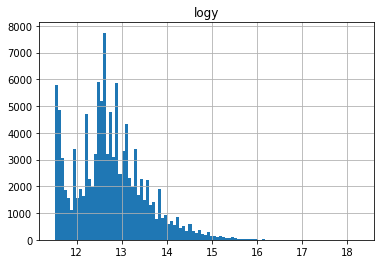

In [23]:
#esto permite graficos dentro del notebook
%matplotlib inline   

#esta libreria tiene algunas funciones matematicas
import math


select = df_casen.ytot > 100000

df_casen['logy'] = df_casen.ytot.apply(math.log)

df_casen[select].hist('logy', bins=100)

## Detour... uso de pickle para guardar objetos de Python

Esto nos permitira cargar objetos de Python (por ej, bases de datos en Pandas) mucho mas rapido

In [5]:
# CODIGO PARA GUARDAR OBJETOS DE PYTHON

import pickle

pickle.dump(df_casen , open("casen_df.pkl", "wb"))   

In [6]:
# CODIGO PARA CARGAR OBJETOS DE PYTHON

df_casen = pickle.load(open("casen_df.pkl", "rb"))

# Ahora podemos seguir trabajando con el DataFrame

Tambien se pueden ocupar las funciones de Pandas "read_pickle" y "to_pickle", pero conocer la forma general de guardar objetos a través de Pickle es muy útil en otras aplicaciones